# Matplotlib - The Power of Plots 

As a senior data analyst at Pymaceuticals Inc., I have been given access to the complete data from their recent animal study. 

249 mice have been identified with SCC (Squamous Cell Carcinoma) , a commonly occuring form of skin cancer. They were treated with a variety of drug regiments. Over the course of 45 days, tumor development was observed and measured. 

This study was used to compare the performance of Pymaceuticals' drug of interest, Capomulin, versus the other treatment regimens and to generate all of the tables and figures needed for the technical report of the study. Also a summary of the study results. 

## Analysis from the study

* Out of ten treatments, we looked at four specific ones. The treatments being analyzed are Capomulin, Ramicane, Infubinol, and  Ceftamin. Based on average final tumor volume both Capomulin and Ramicane appeared to be equally effective, but to be sure of this we would need to make sure the starting tumor volumes were equivalent. Of these four drugs of interest (Capomulin, Ramicane, Infubinol, and Ceftamin) only Infubinol had one outlier data point.

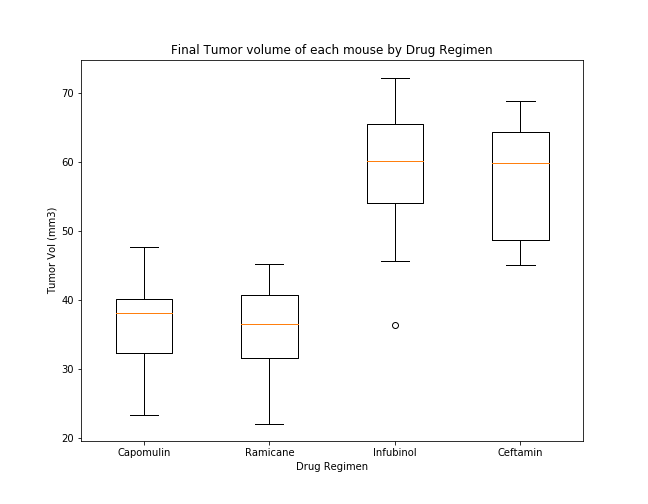

* Out of ten treatments, we looked at four specific ones. The treatments being analyzed are Capomulin, Ramicane, Infubinol, and  Ceftamin. We studied the Capomulin regimen, it showed a decrease of tumor volume through the 45 day trial period. It would beneficial to continue this regimen for more time period to see if the treatment works to remove the tumor.

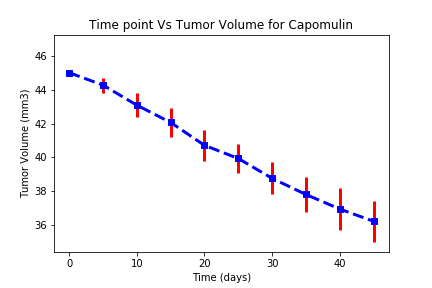

* From the mouse weight vs average tumor volume study, we can say that the Mouse weight correlated strongly (R-squared of 0.84) with average tumor volume. Therefore correlating only the final tumor volume without controlling for mouse weight could skew the interpretation of the desired result.

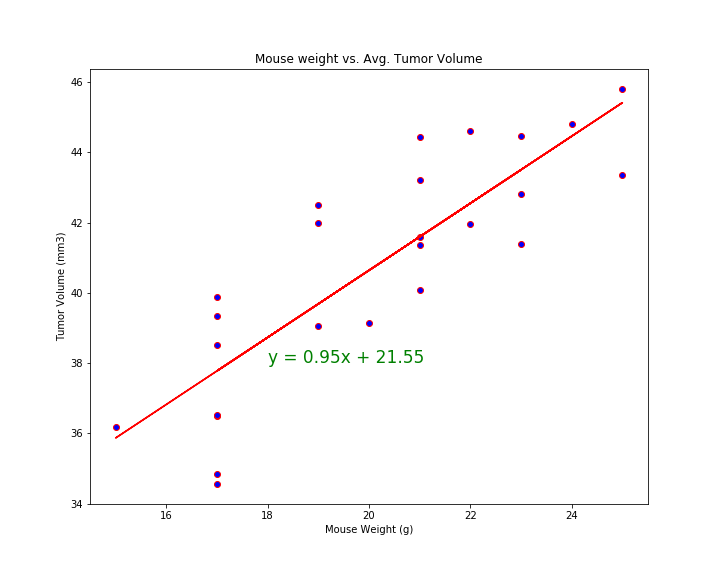

* The study had almost the same number of male and female mice. It would be interesting to find out if the gender of the mouse effected the outcome of the regimen. 

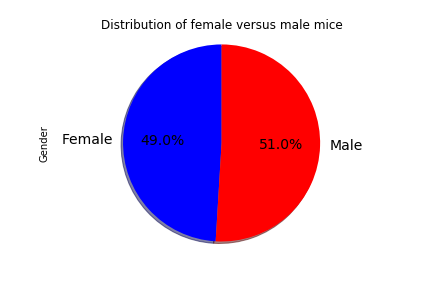


### Dependencies and Setup

In [1]:

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import os
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = os.path.join(".", "data", "Mouse_metadata.csv")
study_results_path = os.path.join(".", "data", "Study_results.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouseid_data = pd.merge(mouse_metadata, study_results, how='outer', on=['Mouse ID'])

# Display the data table for preview
mouseid_data.head(20)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


### Checking the number of mice.

In [2]:
mouseid_data['Mouse ID'].value_counts()

g989    13
m650    10
c559    10
g296    10
t718    10
        ..
o848     1
x336     1
d133     1
b447     1
l872     1
Name: Mouse ID, Length: 249, dtype: int64

### Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

In [3]:
duplicate_mouseid = mouseid_data[mouseid_data.duplicated(['Mouse ID', 'Timepoint'])]
print(duplicate_mouseid)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


 ### Create a clean DataFrame by dropping the duplicate mouse by its ID.

In [4]:
clean_data = mouseid_data.loc[mouseid_data["Mouse ID"] != "g989", :]
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


### Checking the number of mice in the clean DataFrame.

In [5]:
clean_data['Mouse ID'].value_counts()

m650    10
c559    10
g296    10
t718    10
w914    10
        ..
x226     1
o848     1
u153     1
n482     1
b447     1
Name: Mouse ID, Length: 248, dtype: int64

# Summary Statistics

### Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

In [6]:
# Generate a summary statistics table by chaining .groupby(), .agg() and .round() methods

drug_stats = clean_data.groupby('Drug Regimen').agg(\
        # Get the mean of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_Mean=('Tumor Volume (mm3)', np.mean),\
        # Get the median of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_Median=('Tumor Volume (mm3)', np.median),\
        # Get the variance of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_Var=('Tumor Volume (mm3)', np.var),\
        # Get the standard deviation of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_Stdev=('Tumor Volume (mm3)', np.std),\
        # Get the standard error of measurement (SEM) of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_SEM=('Tumor Volume (mm3)', st.sem)\
).round(3)

# Display the Summary statistics table grouped by 'Drug Regimen' column
drug_stats

C:\Users\shims\anaconda3\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\shims\anaconda3\lib\site-packages\numpy\core\_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\shims\anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,Tumor_Vol_Mean,Tumor_Vol_Median,Tumor_Vol_Var,Tumor_Vol_Stdev,Tumor_Vol_SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


# Bar and Pie Charts

###  Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.

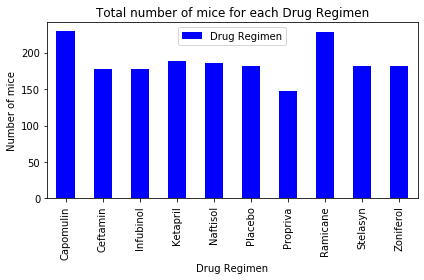

In [7]:
# First create a dataframe grouping by the 'Drug Regimen' column
drug_group = clean_data.groupby('Drug Regimen')

# Create a dataframe counting the number of data points for each Drug Regimen
drug_group_count = pd.DataFrame(drug_group['Drug Regimen'].count())


# Create a bar chart based off of the group series from before and label the title
count_chart = drug_group_count.plot(kind='bar', title="Total number of mice for each Drug Regimen", color="blue")

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Number of mice")
plt.tight_layout()

# Save the figure
output_path = os.path.join(".", "image", "Total_num_mice_panda.png")
plt.savefig(output_path)
plt.show()

### Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

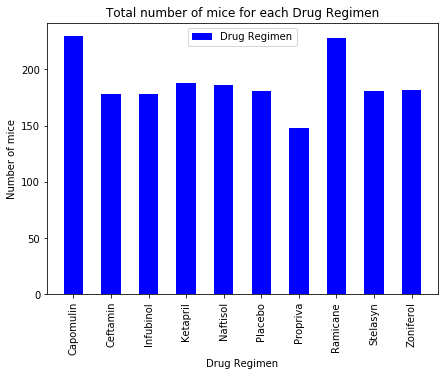

In [8]:
# Using the same groupby dataframe as above
# Set x axis and tick locations
x_axis = np.arange(len(drug_group_count))
tick_locations = [value for value in x_axis]

 # Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(7,5))
plt.bar(x_axis, drug_group_count["Drug Regimen"], color='blue', align="center", width = 0.52)
plt.xticks(tick_locations, list(drug_group_count.index), rotation="vertical")

# Set x and y limits
plt.xlim(-0.7, len(x_axis)-0.3)
plt.ylim(0, max(drug_group_count["Drug Regimen"])*1.05)

# Set a Title and labels
plt.title("Total number of mice for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of mice")

column_name = ["Drug Regimen"]
plt.legend(column_name, loc="best")

# Save the figure
output_path = os.path.join(".", "image", "Total_num_mice_pyplot.png")
plt.savefig(output_path)
plt.show()


### Generate a pie plot showing the distribution of female versus male mice using pandas

In [9]:
# Grouping by gender
group_gender = clean_data.groupby('Sex')

# Create a dataframe to count the number of data points for each gender
group_gender_count = pd.DataFrame(group_gender['Sex'].count())

# View the groupby dataframe
group_gender_count.head()

,Sex
Sex,
Female,922
Male,958


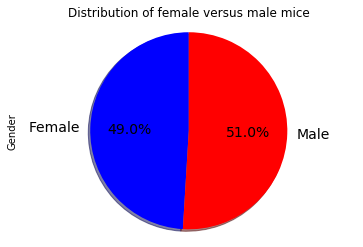

In [10]:
# Create a pie chart using above values
gender_pie = group_gender_count.plot(kind='pie', y='Sex',title="Distribution of female versus male mice", startangle=90,\
                        autopct='%1.1f%%',shadow=True, fontsize=14, colors =["blue","red"],legend =False)
# Make the axis equal
plt.axis("equal")

gender_pie.set_ylabel("Gender")

# Save the figure
output_path = os.path.join(".", "image", "gender_panda.png")
plt.savefig(output_path)

plt.show()

### Generate a pie plot showing the distribution of female versus male mice using pyplot

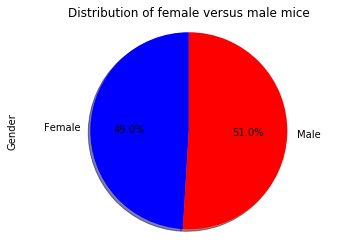

In [11]:
# Get Labels for our pie chart 
genders = list(group_gender_count.index.values)

# The values of each section of the pie chart
gender_counts = group_gender_count['Sex']

# The colors of each section of the pie chart
colors = ["blue", "red"]

# Creates the pie chart based upon the values above

plt.pie(gender_counts, labels=genders, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)

plt.title("Distribution of female versus male mice")
plt.ylabel("Gender")
plt.axis("equal")

# Save the figure
output_path = os.path.join(".", "image", "gender_pyplot.png")
plt.savefig(output_path)

plt.show()

# Quartiles, Outliers and Boxplots

### Calculate the final tumor volume of each mouse across four of the treatment regimens:  
### Capomulin, Ramicane, Infubinol, and Ceftamin

In [12]:
#Creating a list for the four drugs
list_four_drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Filter the original clean_data dataframe using the list of four drugs
four_drugs = clean_data[clean_data['Drug Regimen'].isin(list_four_drugs)]

# View the newly created subset dataframe
four_drugs.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


### Start by getting the last (greatest) timepoint for each mouse

In [13]:
# Then groupby 'Mouse ID' 
# Get the last value of the 'Tumor Volume (mm3)' 
last_tumor = four_drugs.groupby(['Drug Regimen','Mouse ID']).agg(Last_tumor_size=('Tumor Volume (mm3)', lambda x: x.iloc[-1]))

# View the groupby dataframe
last_tumor

Last_tumor_size
Drug Regimen Mouse ID                 
Capomulin    b128            38.982878
             b742            38.939633
             f966            30.485985
             g288            37.074024
             g316            40.159220
...                                ...
Ramicane     s508            30.276232
             u196            40.667713
             w678            43.166373
             y449            44.183451
             z578            30.638696

[100 rows x 1 columns]

### Merge this group df with the original dataframe to get the tumor volume at the last timepoint

In [14]:
# Merge the last tumor size 
last_tumor_merge = last_tumor.stack(level=0).unstack(level=0)
# View the result 
last_tumor_merge.head()

,Drug Regimen,Capomulin,Ceftamin,Infubinol,Ramicane
Mouse ID,,,,,
a203,Last_tumor_size,NaN,NaN,67.973419,NaN
a251,Last_tumor_size,NaN,NaN,65.525743,NaN
a275,Last_tumor_size,NaN,62.999356,NaN,NaN
a411,Last_tumor_size,NaN,NaN,NaN,38.407618
a444,Last_tumor_size,NaN,NaN,NaN,43.047543


### Calculate the IQR and quantitatively determine if there are any potential outliers.

In [15]:
# Set counter to 0 which is used to only print dividing line at top of output
counter = 0

# Do quartile calculations for each drug
for drug in list_four_drugs:
    quartiles = last_tumor_merge[drug].quantile([.25,.5,.75])
    Q1 = quartiles[0.25]
    Q3 = quartiles[0.75]
    iqr = Q3-Q1
    lower_bound = Q1 - (1.5*iqr)
    upper_bound = Q3 + (1.5*iqr)
    
# Check if it is the first time through the for loop, if so then print dividing line at top only
    if counter == 0:
        print(f"--------------------------------------------------------")
    print(f"{drug} IQR data is:")
    print(f"The lower quartile of {drug} is: {Q1}")
    print(f"The upper quartile of {drug} is: {Q3}")
    print(f"The interquartile range of {drug} is: {iqr}")
    print(f"The the median of {drug} is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} for {drug} could be outliers.")
    print(f"Values above {upper_bound} for {drug} could be outliers.")
    print(f"--------------------------------------------------------")
    counter += 1
    
    

--------------------------------------------------------
Capomulin IQR data is:
The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.125164399999996 
Values below 20.70456164999999 for Capomulin could be outliers.
Values above 51.83201549 for Capomulin could be outliers.
--------------------------------------------------------
Ramicane IQR data is:
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229 
Values below 17.912664470000003 for Ramicane could be outliers.
Values above 54.30681135 for Ramicane could be outliers.
--------------------------------------------------------
Infubinol IQR data is:
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile ra

### Generate a box plot of the final tumor volume of each mouse across four regimens of interest

In [16]:
# Create list after removing NaN values

# Create an empty list
boxplot_list = []

# Iterate through the list of the four drugs names using them to select the same column names
# and appending to the boxplot_list

for drug in list_four_drugs:
    boxplot_list.append(list(last_tumor_merge[drug].dropna()))
    

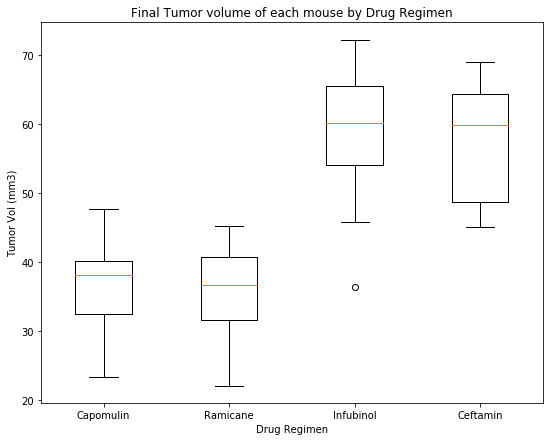

In [17]:
# Plot the list using a boxplot 
fig1, ax = plt.subplots(figsize=(9,7))
ax.set_title('Final Tumor volume of each mouse by Drug Regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Vol (mm3)')
ax.boxplot(boxplot_list,notch=0)
plt.xticks([1,2,3,4],list_four_drugs)

# Save the figure
output_path = os.path.join(".", "image", "boxplot.png")
plt.savefig(output_path)

plt.show()

### Line and Scatter Plots

### Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [18]:
# Create a dataframe for Capomulin data
capomulin_data = clean_data.loc[clean_data['Drug Regimen'] == 'Capomulin']

# View the dataframe
capomulin_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [19]:
# Groupby timepoint and then get the mean of the tumor volume 

capomulin_time = capomulin_data.groupby(['Timepoint']).agg(Tumor_Vol_Mean=('Tumor Volume (mm3)', np.mean),\
                Tumor_Vol_SEM=('Tumor Volume (mm3)', st.sem))

# View the groupby dataframe 
capomulin_time.head(20)

C:\Users\shims\anaconda3\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\shims\anaconda3\lib\site-packages\numpy\core\_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\shims\anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,Tumor_Vol_Mean,Tumor_Vol_SEM
Timepoint,,
0,45.000000,0.000000
5,44.266086,0.448593
10,43.084291,0.702684
15,42.064317,0.838617
20,40.716325,0.909731
25,39.939528,0.881642
30,38.769339,0.934460
35,37.816839,1.052241
40,36.958001,1.223608


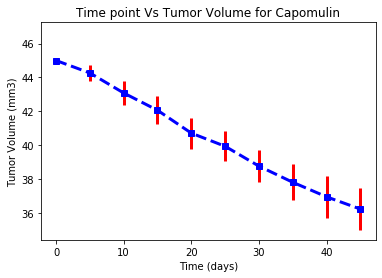

In [20]:
# Plot a line plot using error bars

# get the values for the x axis
time = list(capomulin_time.index.values)

# Use errorbar plot from matplotlib
plt.errorbar(time, capomulin_time['Tumor_Vol_Mean'], yerr=capomulin_time['Tumor_Vol_SEM'], label="Time point Vs Tumor Volume for Capomulin",
    fmt="bs--", linewidth=3, ecolor="red" )

# Add the descriptive title, x labels and y labels
plt.title("Time point Vs Tumor Volume for Capomulin")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")

# Set x and y limits 
plt.xlim(min(time)-max(time)*0.05, max(time)*1.05)
plt.ylim(min(capomulin_time['Tumor_Vol_Mean'])*0.95, max(capomulin_time['Tumor_Vol_Mean'])*1.05)
plt.rcParams["figure.figsize"] = [8,7]

# Save the figure
output_path = os.path.join(".", "image", "lineplot.png")
plt.savefig(output_path)

plt.show()

 ### Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [21]:
# View Capomulin dataframe
capomulin_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [22]:
# Groupby Mouse ID and get the weight and mean of tumor volume
group_mouse_id = capomulin_data.groupby(['Mouse ID']).agg(Mouse_weight=('Weight (g)', np.mean), Tumor_vol_mean=('Tumor Volume (mm3)', np.mean))
group_mouse_id.head()

,Mouse_weight,Tumor_vol_mean
Mouse ID,,
b128,22,41.963636
b742,21,40.083699
f966,17,36.505973
g288,19,41.990097
g316,22,44.613344


### Create the scatter plot

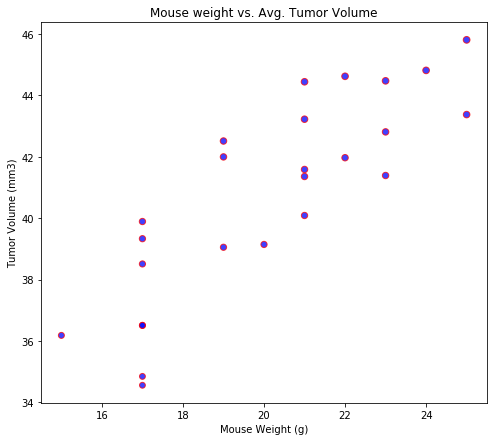

In [23]:
#create scatter plot from the above dataframe
plt.scatter(group_mouse_id['Mouse_weight'], group_mouse_id['Tumor_vol_mean'], marker='o', facecolors='Blue', edgecolors='red', s=group_mouse_id['Tumor_vol_mean'], alpha=.75)

# Create a title, x label, and y label for our chart
plt.title("Mouse weight vs. Avg. Tumor Volume")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")


plt.show()

###  Correlation and Regression

### Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

In [24]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(group_mouse_id['Mouse_weight'],group_mouse_id['Tumor_vol_mean'])
print(f"The correlation between both factors is {(correlation[0])}")

The correlation between both factors is 0.8419363424694717


### Add the linear regression equation and line to plot

In [25]:
x_values = group_mouse_id['Mouse_weight']
y_values = group_mouse_id['Tumor_vol_mean']

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the predictions for each value of x (# Rooms)
regression_values = x_values * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r-squared is: 0.7088568047708717
The equation of the regression line is: y = 0.95x + 21.55


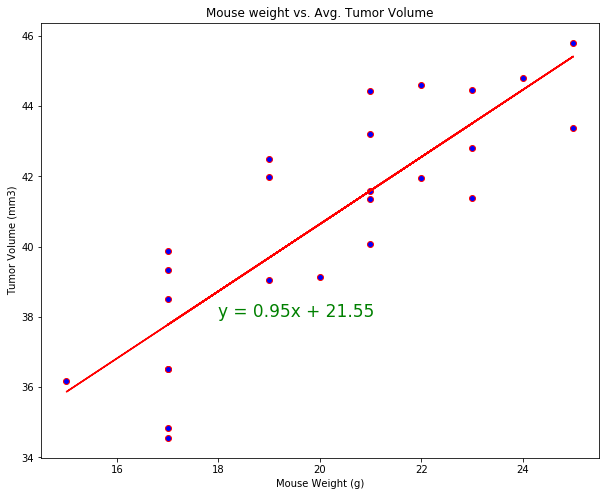

In [27]:
plt.figure(figsize=(10,8))
# Plot observations
plt.scatter(x_values, y_values, marker='o', facecolors='Blue', edgecolors='red')

# Plot the regression line
plt.plot(x_values, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (18, 38), fontsize=17, color="green")

plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Mouse weight vs. Avg. Tumor Volume")
print(f"The r-squared is: {rvalue**2}")
print(f"The equation of the regression line is: {line_eq}")

# Save the figure
output_path = os.path.join(".", "image", "linear_regression.png")
plt.savefig(output_path)

plt.show()